Link to dataset: 
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing 

Metrics attribute: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

Scoring parameter in cross_val_score: http://scikit-learn.org/stable/modules/model_evaluation.html 

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [124]:
pd.set_option('display.max_columns', 70) #https://stackoverflow.com/questions/11707586/python-pandas-how-to-widen-output-display-to-see-more-columns
pd.set_option('display.max_rows', 25)

In [125]:
clients = pd.read_csv('bank-additional-full.csv')
clients.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [126]:
type(clients)

pandas.core.frame.DataFrame

In [127]:
#41,188 rows and 21 columns
clients.shape

(41188, 21)

In [128]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [129]:
clients.isnull().sum() #no null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [130]:
for i in clients.columns.tolist():  #Skim through the variables
    print(i)
    print(clients[i].value_counts())

#clients.columns[0]
#clients.job.value_counts()
#clients[job].value_counts()
#clients.groupby('job').job.count().sort_values(ascending=False)

age
31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
      ... 
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
d

In [131]:
clients.duplicated().sum()

12

In [132]:
is_duplicate = clients.duplicated(keep=False)
#clients[is_duplicate] --- to check if indeed the 12 rows are dups

In [133]:
clients.drop_duplicates(keep="first", inplace=True)

In [134]:
clients.reset_index(drop=True, inplace=True) #reset index after dropping dups

In [135]:
clients.shape

(41176, 21)

In [136]:
features = clients.iloc[:,:-1].drop(columns=['education'])
edu = clients['education']
target = clients.iloc[:,-1]

In [137]:
features.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [138]:
target.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [139]:
pd.get_dummies(features).head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [140]:
features_dummy = pd.get_dummies(features).drop(columns=['job_unknown', 'marital_unknown', 'default_unknown', 
                                                        'housing_unknown', 'loan_unknown', 'contact_telephone', 
                                                        'month_apr', 'day_of_week_mon', 'poutcome_nonexistent'])
#k-level of cat variables are represented by (k-1) dummy variable in the dataset

In [141]:
features_dummy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [142]:
#education variable is ordinal, therefore manual mapping is done here.
edu_mapping={'unknown':0, 'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5, 'professional.course':6, 
            'university.degree':7}
edu_LE = np.array(edu.map(edu_mapping))
edu_ordinal=pd.Series(edu_LE)
edu_ordinal.name='edu_ordinal'

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_LE = le.fit_transform(target.values)

In [144]:
y_coded=pd.Series(y_LE)

In [145]:
features_dummy.shape

(41176, 46)

In [146]:
edu_ordinal.shape

(41176,)

In [147]:
y_coded.shape

(41176,)

In [148]:
y_coded.name='y_coded'

In [149]:
clients_all = pd.concat([features_dummy, edu_ordinal, y_coded], axis=1) #combine all variables tog after necc. processing

#interim = pd.merge(features_dummy, pd.DataFrame(edu_ordinal), left_index=True, right_index=True)
#clients_all = pd.merge(interim, pd.DataFrame(y_coded),left_index=True, right_index=True)
#clients_all = pd.concat([features_dummy, edu_ordinal, y_coded], axis=1, join_axes=[features_dummy.index])
#interim1 = pd.concat((features_dummy, edu_ordinal), axis=1)
#clients_all = pd.concat((interim1,y_coded), axis=1)
#interim1 = features_dummy.join(edu_ordinal)
#clients_all = interim1.join(y_coded)
#clients_all = pd.concat([features_dummy, edu_ordinal, y_coded], axis=1, join_axes=[features_dummy.index])
#https://pandas.pydata.org/pandas-docs/version/0.20/merging.html

In [150]:
clients_all.tail()
#clients_all.to_csv('file.csv', sep='\t')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success,edu_ordinal,y_coded
41171,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,6,1
41172,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,6,0
41173,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,7,0
41174,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,6,1
41175,74,239,3,999,1,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,6,0


In [151]:
clients_all.shape

(41176, 48)

In [152]:
clients_all.y_coded.value_counts()

0    36537
1     4639
Name: y_coded, dtype: int64

In [153]:
from sklearn.preprocessing import MinMaxScaler #normalise all variables in clients_all dataset into (0,1) scale
mms = MinMaxScaler()
clients_all_norm = mms.fit_transform(clients_all)

In [154]:
clients_all_norm = pd.DataFrame(clients_all_norm, columns = clients_all.columns) 

#converting normalised array into a dataframe and assigning column names to it
#https://stackoverflow.com/questions/29586323/how-to-retain-column-headers-of-data-frame-after-pre-processing-in-scikit-learn

In [155]:
clients_all_norm = clients_all_norm.drop(['duration'], axis=1) 
#drop duration variable as suggested by dataset source: https://archive.ics.uci.edu/ml/datasets/bank+marketing
clients_all_norm.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success,edu_ordinal,y_coded
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.0
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,0.0
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,0.0
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,0.0
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286,0.0


In [156]:
X_Matrix = clients_all_norm.iloc[:,:-1] #Separating dataset into features & target variable
X_Matrix.shape

(41176, 46)

In [157]:
y_series = clients_all_norm.y_coded #Separating dataset into features & target variable
y_series.value_counts()

0.0    36537
1.0     4639
Name: y_coded, dtype: int64

### <font color='darkgreen'>feature selection</font>

Ensure features are on the same scale before regularisation: https://stats.stackexchange.com/questions/189176/why-do-we-need-to-normalize-data-before-applying-penalizing-methods-in-the-frame

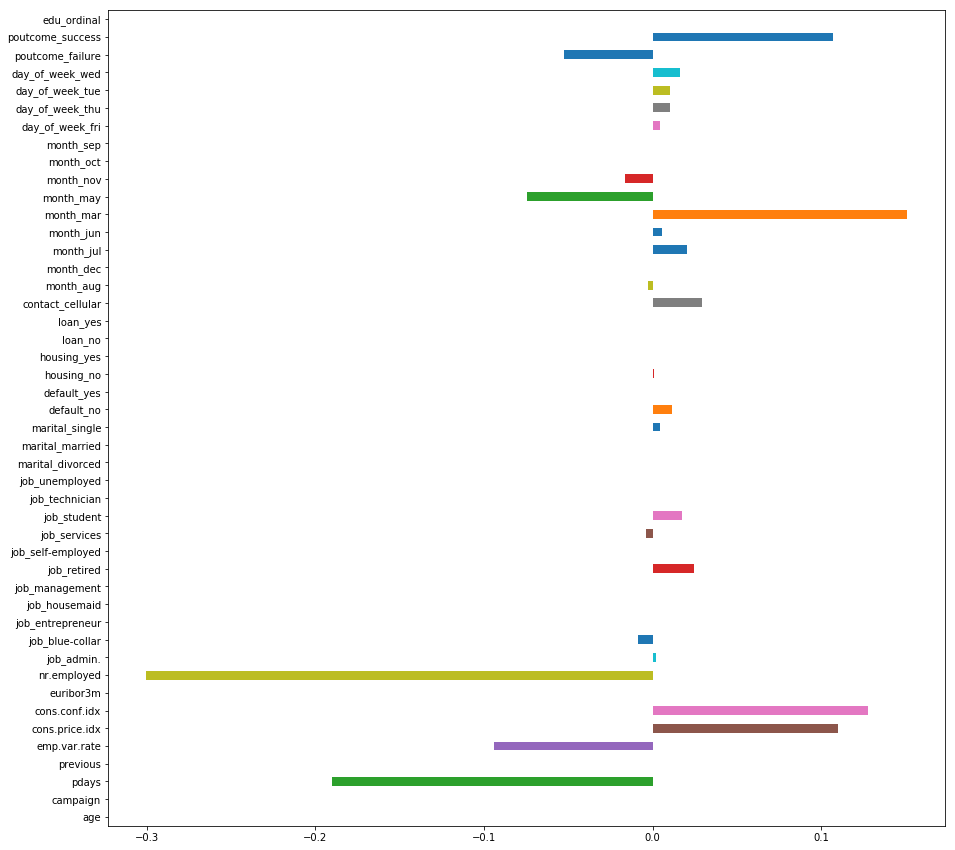

In [158]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=0.001)

EN.fit(X_Matrix, y_series)

#Plot the importance of features
plt.figure(figsize=(15,15))
ft_importances_EN=pd.Series(EN.coef_, index=X_Matrix.columns)
ft_importances_EN.plot(kind='barh')
plt.show()

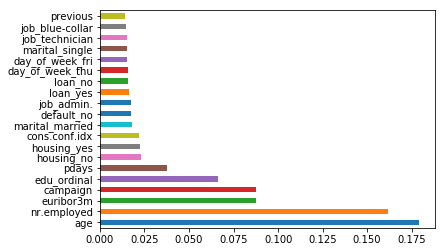

In [159]:
from sklearn import tree
clf_cart = tree.DecisionTreeClassifier(random_state=1)
impt = clf_cart.fit(X_Matrix,y_series).feature_importances_

feat_importances = pd.Series(impt, index=X_Matrix.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [160]:
num = clients.select_dtypes(['int64', 'float64'])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_sc = mms.fit_transform(num)
num_sc = pd.DataFrame(num_sc, columns = num.columns) 

from statsmodels.stats.outliers_influence import variance_inflation_factor
num_values = num_sc.values #https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array-preserving-index
for i in range(10):
    j = ['age','duration','campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
    print(str(j[i]) + ": " + str(round(variance_inflation_factor(num_values, i))))

age: 6.0
duration: 2.0
campaign: 1.0
pdays: 33.0
previous: 2.0
emp.var.rate: 194.0
cons.price.idx: 28.0
cons.conf.idx: 7.0
euribor3m: 126.0
nr.employed: 116.0


### <font color='brown'>reduce features</font>

In [175]:
X_Matrix = clients_all_norm.iloc[:,:-1] #Separating dataset into features & target variable
X_Matrix.shape

(41176, 46)

In [173]:
y_series = clients_all_norm.y_coded #Separating dataset into features & target variable
y_series.value_counts()

0.0    36537
1.0     4639
Name: y_coded, dtype: int64

In [176]:
X_Matrix.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success,edu_ordinal
0,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285714
1,0.493827,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286
2,0.246914,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286
3,0.283951,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571
4,0.481481,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286


In [186]:
X_Matrix = X_Matrix[['poutcome_failure', 'poutcome_success', 'nr.employed', 'cons.price.idx', 
                     'cons.conf.idx', 'emp.var.rate', 'pdays']]

X_Matrix.head()

,poutcome_failure,poutcome_success,nr.employed,cons.price.idx,cons.conf.idx,emp.var.rate,pdays
0,0.0,0.0,0.859735,0.698753,0.60251,0.9375,1.0
1,0.0,0.0,0.859735,0.698753,0.60251,0.9375,1.0
2,0.0,0.0,0.859735,0.698753,0.60251,0.9375,1.0
3,0.0,0.0,0.859735,0.698753,0.60251,0.9375,1.0
4,0.0,0.0,0.859735,0.698753,0.60251,0.9375,1.0


# Method 1: OVERSAMPLING -Taking Bootstrap samples of minority class

## <font color='blue'>LOG REG</font>

In [268]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [269]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    training_set = pd.concat([X_train,y_train], axis=1)
    
    #from sklearn.utils import resample
    training_majority = training_set[training_set.y_coded==0]
    training_minority = training_set[training_set.y_coded==1]

    training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
    all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

    X_train_upsampled = all_training_upsampled.iloc[:,:-1]
    y_train_upsampled = all_training_upsampled.iloc[:,-1]

    logreg=LogisticRegression(random_state=1)

    logreg.fit(X_train_upsampled,y_train_upsampled)
    pred_train = logreg.predict(X_train_upsampled)
    true_train = y_train_upsampled
    pred = logreg.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.732
accuracy score of test set: 0.764
auc score of test set: 0.723
recall score of test set: 0.672
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.85     12176
        1.0       0.28      0.67      0.39      1550

avg / total       0.87      0.76      0.80     13726

 
Fold 2:
accuracy score of training set: 0.726
accuracy score of test set: 0.768
auc score of test set: 0.735
recall score of test set: 0.691
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     12153
        1.0       0.29      0.69      0.41      1572

avg / total       0.88      0.77      0.80     13725

 
Fold 3:
accuracy score of training set: 0.732
accuracy score of test set: 0.771
auc score of test set: 0.723
recall score of test set: 0.662
classification report of test set: 
             precision    recall  f

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

from sklearn.utils import resample
training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

X_train_upsampled = all_training_upsampled.iloc[:,:-1]
y_train_upsampled = all_training_upsampled.iloc[:,-1]

logreg=LogisticRegression(random_state=1)

logreg.fit(X_train_upsampled,y_train_upsampled)
pred_train = logreg.predict(X_train_upsampled)
true_train = y_train_upsampled
pred = logreg.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[8579 2388]
 [ 414  972]]
accuracy score of training set: 0.719
accuracy score of test set: 0.773
auc score of test set: 0.742
recall score of test set: 0.701
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     10967
        1.0       0.29      0.70      0.41      1386

avg / total       0.88      0.77      0.81     12353



In [190]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

X_train_upsampled = all_training_upsampled.iloc[:,:-1]
y_train_upsampled = all_training_upsampled.iloc[:,-1]

logreg=LogisticRegression(random_state=1)

logreg.fit(X_train_upsampled,y_train_upsampled)
pred_train = logreg.predict(X_train_upsampled)
true_train = y_train_upsampled
pred = logreg.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[5713 1601]
 [ 278  644]]
accuracy score of training set: 0.726
accuracy score of test set: 0.772
auc score of test set: 0.74
recall score of test set: 0.698
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86      7314
        1.0       0.29      0.70      0.41       922

avg / total       0.88      0.77      0.81      8236



## <font color='blue'>KNN</font>

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
#computationally expensive (time consuming) to do cv on KNN

In [193]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
for i in range(1,9):
    for train_index, test_index in kf.split(clients_all_norm):
        X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
        y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
        training_set = pd.concat([X_train,y_train], axis=1)
    
        training_majority = training_set[training_set.y_coded==0]
        training_minority = training_set[training_set.y_coded==1]

        #from sklearn.utils import resample
        training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
        all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

        X_train_upsampled = all_training_upsampled.iloc[:,:-1]
        y_train_upsampled = all_training_upsampled.iloc[:,-1]
    
        knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
        knn.fit(X_train_upsampled, y_train_upsampled)
    
        pred_train = knn.predict(X_train_upsampled)
        true_train = y_train_upsampled
        pred = knn.predict(X_test)
        true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.657
    accuracy of test set: 0.855
    auc of test set: 0.633
    recall of test set: 0.348
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.92      0.92     12229
        1.0       0.34      0.35      0.34      1496

avg / total       0.86      0.86      0.86     13725

 
K=2 accuracy of training set: 0.596
    accuracy of test set: 0.887
    auc of test set: 0.583
    recall of test set: 0.193
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94     12229
        1.0       0.46      0.19      0.27      1496

avg / total       0.86      0.89      0.87     13725

 
K=3 accuracy of training set: 0.634
    accuracy of test set: 0.888
    auc of test set: 0.619
    recall of test set: 0.275
    classification report of test set: 
             precision    recall  f1-score   support

        0.0      

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

X_train_upsampled = all_training_upsampled.iloc[:,:-1]
y_train_upsampled = all_training_upsampled.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class

knn.fit(X_train_upsampled,y_train_upsampled)
pred_train = knn.predict(X_train_upsampled)
true_train = y_train_upsampled
pred = knn.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[10501   466]
 [ 1035   351]]
accuracy score of training set: 0.612
accuracy score of test set: 0.878
auc score of test set: 0.605
recall score of test set: 0.253
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.91      0.96      0.93     10967
        1.0       0.43      0.25      0.32      1386

avg / total       0.86      0.88      0.86     12353



In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_minority_upsampled = resample(training_minority, replace=True, n_samples=training_majority.shape[0], random_state=1)
all_training_upsampled = pd.concat([training_majority,training_minority_upsampled], axis=0)

X_train_upsampled = all_training_upsampled.iloc[:,:-1]
y_train_upsampled = all_training_upsampled.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class

knn.fit(X_train_upsampled,y_train_upsampled)
pred_train = knn.predict(X_train_upsampled)
true_train = y_train_upsampled
pred = knn.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[7095  219]
 [ 713  209]]
accuracy score of training set: 0.61
accuracy score of test set: 0.887
auc score of test set: 0.598
recall score of test set: 0.227
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94      7314
        1.0       0.49      0.23      0.31       922

avg / total       0.86      0.89      0.87      8236



## <font color='blue'>SVM</font>

## <font color='blue'>CART</font>

## <font color='blue'>RF</font>

## <font color='blue'>Naive Bayes</font>

## <font color='blue'>NN</font>

## <font color='blue'>AdaBoost</font>

## <font color='blue'>Gradient Boost</font>

## <font color='blue'>XG Boost</font>

# Method 2: UNDERSAMPLING -Taking smaller samples of majority class

## <font color='blue'>LOG REG</font>

In [196]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    training_set = pd.concat([X_train,y_train], axis=1)
    
    training_majority = training_set[training_set.y_coded==0]
    training_minority = training_set[training_set.y_coded==1]

    #from sklearn.utils import resample
    training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
    all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

    X_train_downsampled = all_training_downsampled.iloc[:,:-1]
    y_train_downsampled = all_training_downsampled.iloc[:,-1]

    logreg=LogisticRegression(random_state=1)

    logreg.fit(X_train_downsampled,y_train_downsampled)
    pred_train = logreg.predict(X_train_downsampled)
    true_train = y_train_downsampled
    pred = logreg.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.735
accuracy score of test set: 0.767
auc score of test set: 0.721
recall score of test set: 0.662
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     12221
        1.0       0.27      0.66      0.38      1505

avg / total       0.87      0.77      0.80     13726

 
Fold 2:
accuracy score of training set: 0.727
accuracy score of test set: 0.768
auc score of test set: 0.732
recall score of test set: 0.685
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     12182
        1.0       0.28      0.69      0.40      1543

avg / total       0.88      0.77      0.80     13725

 
Fold 3:
accuracy score of training set: 0.727
accuracy score of test set: 0.767
auc score of test set: 0.728
recall score of test set: 0.678
classification report of test set: 
             precision    recall  f

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

X_train_downsampled = all_training_downsampled.iloc[:,:-1]
y_train_downsampled = all_training_downsampled.iloc[:,-1]

logreg=LogisticRegression(random_state=1)

logreg.fit(X_train_downsampled,y_train_downsampled)
pred_train = logreg.predict(X_train_downsampled)
true_train = y_train_downsampled
pred = logreg.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[8579 2388]
 [ 414  972]]
accuracy score of training set: 0.727
accuracy score of test set: 0.773
auc score of test set: 0.742
recall score of test set: 0.701
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     10967
        1.0       0.29      0.70      0.41      1386

avg / total       0.88      0.77      0.81     12353



In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

X_train_downsampled = all_training_downsampled.iloc[:,:-1]
y_train_downsampled = all_training_downsampled.iloc[:,-1]

logreg=LogisticRegression(random_state=1)

logreg.fit(X_train_downsampled,y_train_downsampled)
pred_train = logreg.predict(X_train_downsampled)
true_train = y_train_downsampled
pred = logreg.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[5713 1601]
 [ 278  644]]
accuracy score of training set: 0.725
accuracy score of test set: 0.772
auc score of test set: 0.74
recall score of test set: 0.698
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86      7314
        1.0       0.29      0.70      0.41       922

avg / total       0.88      0.77      0.81      8236



## <font color='blue'>KNN</font>

In [199]:
#computationally expensive (time consuming) to do cv on KNN

In [200]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
for i in range(1,9):
    for train_index, test_index in kf.split(clients_all_norm):
        X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
        y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
        training_set = pd.concat([X_train,y_train], axis=1)
    
        training_majority = training_set[training_set.y_coded==0]
        training_minority = training_set[training_set.y_coded==1]

        #from sklearn.utils import resample
        training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
        all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

        X_train_downsampled = all_training_downsampled.iloc[:,:-1]
        y_train_downsampled = all_training_downsampled.iloc[:,-1]

        knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
        knn.fit(X_train_downsampled, y_train_downsampled)
    
        pred_train = knn.predict(X_train_downsampled)
        true_train = y_train_downsampled
        pred = knn.predict(X_test)
        true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.576
    accuracy of test set: 0.842
    auc of test set: 0.559
    recall of test set: 0.196
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.90      0.92      0.91     12229
        1.0       0.23      0.20      0.21      1496

avg / total       0.83      0.84      0.84     13725

 
K=2 accuracy of training set: 0.581
    accuracy of test set: 0.879
    auc of test set: 0.564
    recall of test set: 0.162
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.90      0.97      0.93     12229
        1.0       0.37      0.16      0.23      1496

avg / total       0.85      0.88      0.86     13725

 
K=3 accuracy of training set: 0.609
    accuracy of test set: 0.878
    auc of test set: 0.591
    recall of test set: 0.225
    classification report of test set: 
             precision    recall  f1-score   support

        0.0      

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

X_train_downsampled = all_training_downsampled.iloc[:,:-1]
y_train_downsampled = all_training_downsampled.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
knn.fit(X_train_downsampled, y_train_downsampled)
    
pred_train = knn.predict(X_train_downsampled)
true_train = y_train_downsampled
pred = knn.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[10573   394]
 [  945   441]]
accuracy score of training set: 0.641
accuracy score of test set: 0.892
auc score of test set: 0.641
recall score of test set: 0.318
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.96      0.94     10967
        1.0       0.53      0.32      0.40      1386

avg / total       0.87      0.89      0.88     12353



In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
training_set = pd.concat([X_train,y_train], axis=1)

training_majority = training_set[training_set.y_coded==0]
training_minority = training_set[training_set.y_coded==1]

#from sklearn.utils import resample
training_majority_downsampled = resample(training_majority, replace=True, n_samples=training_minority.shape[0], random_state=1)
all_training_downsampled = pd.concat([training_majority_downsampled,training_minority], axis=0)

X_train_downsampled = all_training_downsampled.iloc[:,:-1]
y_train_downsampled = all_training_downsampled.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
knn.fit(X_train_downsampled, y_train_downsampled)
    
pred_train = knn.predict(X_train_downsampled)
true_train = y_train_downsampled
pred = knn.predict(X_test)
true = y_test

print("confusion matrix: ") 
print(str(metrics.confusion_matrix(true, pred)))
print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

confusion matrix: 
[[7071  243]
 [ 651  271]]
accuracy score of training set: 0.629
accuracy score of test set: 0.891
auc score of test set: 0.63
recall score of test set: 0.294
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.94      7314
        1.0       0.53      0.29      0.38       922

avg / total       0.87      0.89      0.88      8236



## <font color='blue'>SVM</font>

## <font color='blue'>CART</font>

## <font color='blue'>RF</font>

## <font color='blue'>Naive Bayes</font>

## <font color='blue'>NN</font>

## <font color='blue'>AdaBoost</font>

## <font color='blue'>Gradient Boost</font>

## <font color='blue'>XG Boost</font>

# Method 3: Rebalancing using SMOTETomek

## <font color='blue'>LOG REG</font>

In [203]:
#train, validate, test = np.split(clients_all_norm.sample(frac=1), [int(.6*len(clients_all_norm)), int(.8*len(clients_all_norm))])
#print(train.shape)
#print(validate.shape)
#print(test.shape)

In [267]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek()
from sklearn.metrics import classification_report

In [263]:
logreg=LogisticRegression(random_state=1)

In [206]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    logreg.fit(X_train_resampled,y_train_resampled)
    pred_train = logreg.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = logreg.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.735
accuracy score of test set: 0.766
auc score of test set: 0.713
recall score of test set: 0.646
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     12180
        1.0       0.27      0.65      0.38      1546

avg / total       0.87      0.77      0.80     13726

 
Fold 2:
accuracy score of training set: 0.723
accuracy score of test set: 0.769
auc score of test set: 0.736
recall score of test set: 0.694
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     12165
        1.0       0.29      0.69      0.41      1560

avg / total       0.88      0.77      0.81     13725

 
Fold 3:
accuracy score of training set: 0.723
accuracy score of test set: 0.767
auc score of test set: 0.732
recall score of test set: 0.686
classification report of test set: 
             precision    recall  f

### Interpretation of Logistic Regression Model

In [347]:
import numpy
from math import log

In [348]:
#coefficients of model
logreg.coef_

array([[-0.5722762 ,  0.20428641, -1.61392436,  0.73539622,  0.49311891,
        -1.72518408, -1.25732514]])

In [349]:
#odds
odds = np.exp(logreg.coef_)
odds

array([[0.56423965, 1.22664943, 0.19910472, 2.08630846, 1.63741521,
        0.17814026, 0.28441378]])

In [350]:
#log_odds
log_odds = np.log(np.exp(logreg.coef_))
log_odds

array([[-0.5722762 ,  0.20428641, -1.61392436,  0.73539622,  0.49311891,
        -1.72518408, -1.25732514]])

In [351]:
#prob
prob = odds/(1 + odds)
prob

array([[0.36071177, 0.55089473, 0.16604448, 0.67598832, 0.62084089,
        0.15120463, 0.2214347 ]])

In [354]:
#coef = pd.DataFrame(logreg.coef_, columns=X_Matrix.columns).T
#for i in logreg.coef_: 
    #print (i)

In [362]:
table = pd.DataFrame(X_Matrix.columns.tolist())
table['coef'] = pd.DataFrame({'coef':i for i in logreg.coef_})
table['odds'] = pd.DataFrame({'odds':i for i in odds})
table['prob'] = pd.DataFrame({'prob':i for i in prob})
table

,0,coef,odds,prob
0,poutcome_failure,-0.572276,0.564240,0.360712
1,poutcome_success,0.204286,1.226649,0.550895
2,nr.employed,-1.613924,0.199105,0.166044
3,cons.price.idx,0.735396,2.086308,0.675988
4,cons.conf.idx,0.493119,1.637415,0.620841
5,emp.var.rate,-1.725184,0.178140,0.151205
6,pdays,-1.257325,0.284414,0.221435


In [207]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    logreg.fit(X_train_resampled,y_train_resampled)
    pred_train = logreg.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = logreg.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.724
accuracy score of test set: 0.767
auc score of test set: 0.737
recall score of test set: 0.7
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.77      0.86      7337
        1.0       0.28      0.70      0.40       899

avg / total       0.88      0.77      0.81      8236

 
Fold 2:
accuracy score of training set: 0.725
accuracy score of test set: 0.77
auc score of test set: 0.728
recall score of test set: 0.674
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86      7291
        1.0       0.29      0.67      0.40       944

avg / total       0.87      0.77      0.81      8235

 
Fold 3:
accuracy score of training set: 0.728
accuracy score of test set: 0.762
auc score of test set: 0.718
recall score of test set: 0.661
classification report of test set: 
             precision    recall  f1-s

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

logreg.fit(X_train_resampled,y_train_resampled)
pred_train = logreg.predict(X_train_resampled)
true_train = y_train_resampled
pred = logreg.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.721
accuracy score of test set: 0.773
auc score of test set: 0.742
recall score of test set: 0.701
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     10967
        1.0       0.29      0.70      0.41      1386

avg / total       0.88      0.77      0.81     12353



In [209]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

logreg.fit(X_train_resampled,y_train_resampled)
pred_train = logreg.predict(X_train_resampled)
true_train = y_train_resampled
pred = logreg.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.726
accuracy score of test set: 0.772
auc score of test set: 0.74
recall score of test set: 0.698
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86      7314
        1.0       0.29      0.70      0.41       922

avg / total       0.88      0.77      0.81      8236



In [266]:
import statsmodels.formula.api as smo
model = smo.Logit(y_train, X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.289602
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_coded   No. Observations:                28823
Model:                          Logit   Df Residuals:                    28816
Method:                           MLE   Df Model:                            6
Date:                Thu, 19 Jul 2018   Pseudo R-squ.:                  0.1783
Time:                        00:20:32   Log-Likelihood:                -8347.2
converged:                       True   LL-Null:                       -10159.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
poutcome_failure    -0.3710      0.060     -6.133      0.000      -0.490      -0.252
poutcome_success     0.5497      0.116      4.726      0.000       0.322       0.778
nr.employed         -0.9639      0.223     -4.332      0.000      -1.400      -0.528
cons.price.idx       1.6506      0.215      7.680      0.000       1.229       2.072
cons.conf.idx        0.6972      0.086      8.110      0.000       0.529       0.866
emp.var.rate        -2.6161      0.281     -9.311      0.000      -3.167      -2.065
pdays               -0.9863      0.101     -9.740      0.000      -1.185      -0.788
====================================================================================
"""

## <font color='blue'>KNN</font>

In [210]:
#computationally expensive (time consuming) to do cv on KNN

In [211]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=1)
for i in range(1,9):
    for train_index, test_index in kf.split(clients_all_norm):
        X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
        y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
        X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
        knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
        knn.fit(X_train_resampled, y_train_resampled)
    
        pred_train = knn.predict(X_train_resampled)
        true_train = y_train_resampled
        pred = knn.predict(X_test)
        true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.655
    accuracy of test set: 0.874
    auc of test set: 0.633
    recall of test set: 0.326
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.92      0.94      0.93     12229
        1.0       0.40      0.33      0.36      1496

avg / total       0.86      0.87      0.87     13725

 
K=2 accuracy of training set: 0.597
    accuracy of test set: 0.84
    auc of test set: 0.58
    recall of test set: 0.248
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91     12229
        1.0       0.26      0.25      0.25      1496

avg / total       0.84      0.84      0.84     13725

 
K=3 accuracy of training set: 0.651
    accuracy of test set: 0.879
    auc of test set: 0.63
    recall of test set: 0.313
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
    knn.fit(X_train_resampled, y_train_resampled)
    
    pred_train = knn.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = knn.predict(X_test)
    true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.623
    accuracy of test set: 0.804
    auc of test set: 0.609
    recall of test set: 0.358
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.91      0.86      0.89     10967
        1.0       0.24      0.36      0.29      1386

avg / total       0.84      0.80      0.82     12353

 
K=2 accuracy of training set: 0.604
    accuracy of test set: 0.887
    auc of test set: 0.581
    recall of test set: 0.186
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94     10967
        1.0       0.49      0.19      0.27      1386

avg / total       0.86      0.89      0.86     12353

 
K=3 accuracy of training set: 0.638
    accuracy of test set: 0.851
    auc of test set: 0.625
    recall of test set: 0.335
    classification report of test set: 
             precision    recall  f1-score   support

        0.0      

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) #instantiate knn class
    knn.fit(X_train_resampled, y_train_resampled)
    
    pred_train = knn.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = knn.predict(X_test)
    true = y_test
    
    print("K="+ str(i)+ " " +"accuracy of training set: " + str(round(metrics.accuracy_score(true_train, pred_train),3)))
    print("  "+ " "+ " " +"accuracy of test set: " + str(round(metrics.accuracy_score(true, pred),3)))
    print("  "+ " "+ " " +"auc of test set: " + str(round(metrics.roc_auc_score(true, pred),3)))
    print("  "+ " "+ " " +"recall of test set: " + str(round(metrics.recall_score(true, pred),3)))
    print("  "+ " "+ " " +"classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")

K=1 accuracy of training set: 0.639
    accuracy of test set: 0.84
    auc of test set: 0.612
    recall of test set: 0.318
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.91      0.91      0.91      7314
        1.0       0.30      0.32      0.31       922

avg / total       0.84      0.84      0.84      8236

 
K=2 accuracy of training set: 0.612
    accuracy of test set: 0.883
    auc of test set: 0.586
    recall of test set: 0.204
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94      7314
        1.0       0.45      0.20      0.28       922

avg / total       0.86      0.88      0.86      8236

 
K=3 accuracy of training set: 0.654
    accuracy of test set: 0.869
    auc of test set: 0.637
    recall of test set: 0.337
    classification report of test set: 
             precision    recall  f1-score   support

        0.0       

## <font color='blue'>SVM</font>

In [214]:
from sklearn import svm
clf_svm = svm.SVC(random_state=1)

In [215]:
#computationally expensive (time consuming) to do cv on SVM

In [216]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_svm.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_svm.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_svm.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.727
accuracy score of test set: 0.767
auc score of test set: 0.727
recall score of test set: 0.675
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     12174
        1.0       0.28      0.68      0.40      1552

avg / total       0.87      0.77      0.80     13726

 
Fold 2:
accuracy score of training set: 0.724
accuracy score of test set: 0.771
auc score of test set: 0.731
recall score of test set: 0.68
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     12192
        1.0       0.28      0.68      0.40      1533

avg / total       0.88      0.77      0.81     13725

 
Fold 3:
accuracy score of training set: 0.728
accuracy score of test set: 0.765
auc score of test set: 0.723
recall score of test set: 0.668
classification report of test set: 
             precision    recall  f1

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_svm.fit(X_train_resampled,y_train_resampled)
pred_train = clf_svm.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_svm.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.72
accuracy score of test set: 0.773
auc score of test set: 0.742
recall score of test set: 0.701
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     10967
        1.0       0.29      0.70      0.41      1386

avg / total       0.88      0.77      0.81     12353



In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_svm.fit(X_train_resampled,y_train_resampled)
pred_train = clf_svm.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_svm.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.723
accuracy score of test set: 0.772
auc score of test set: 0.739
recall score of test set: 0.697
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.78      0.86      7314
        1.0       0.29      0.70      0.41       922

avg / total       0.88      0.77      0.81      8236



## <font color='blue'>CART</font>

In [382]:
from sklearn import tree
clf_cart = tree.DecisionTreeClassifier(random_state=1, max_depth=4)

In [383]:
#computationally expensive (time consuming) to do cv on CART

In [384]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_cart.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_cart.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_cart.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.734
accuracy score of test set: 0.835
auc score of test set: 0.747
recall score of test set: 0.633
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.86      0.90     12194
        1.0       0.36      0.63      0.46      1532

avg / total       0.88      0.84      0.85     13726

 
Fold 2:
accuracy score of training set: 0.74
accuracy score of test set: 0.843
auc score of test set: 0.729
recall score of test set: 0.582
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.88      0.91     12155
        1.0       0.38      0.58      0.46      1570

avg / total       0.88      0.84      0.86     13725

 
Fold 3:
accuracy score of training set: 0.742
accuracy score of test set: 0.832
auc score of test set: 0.727
recall score of test set: 0.59
classification report of test set: 
             precision    recall  f1-

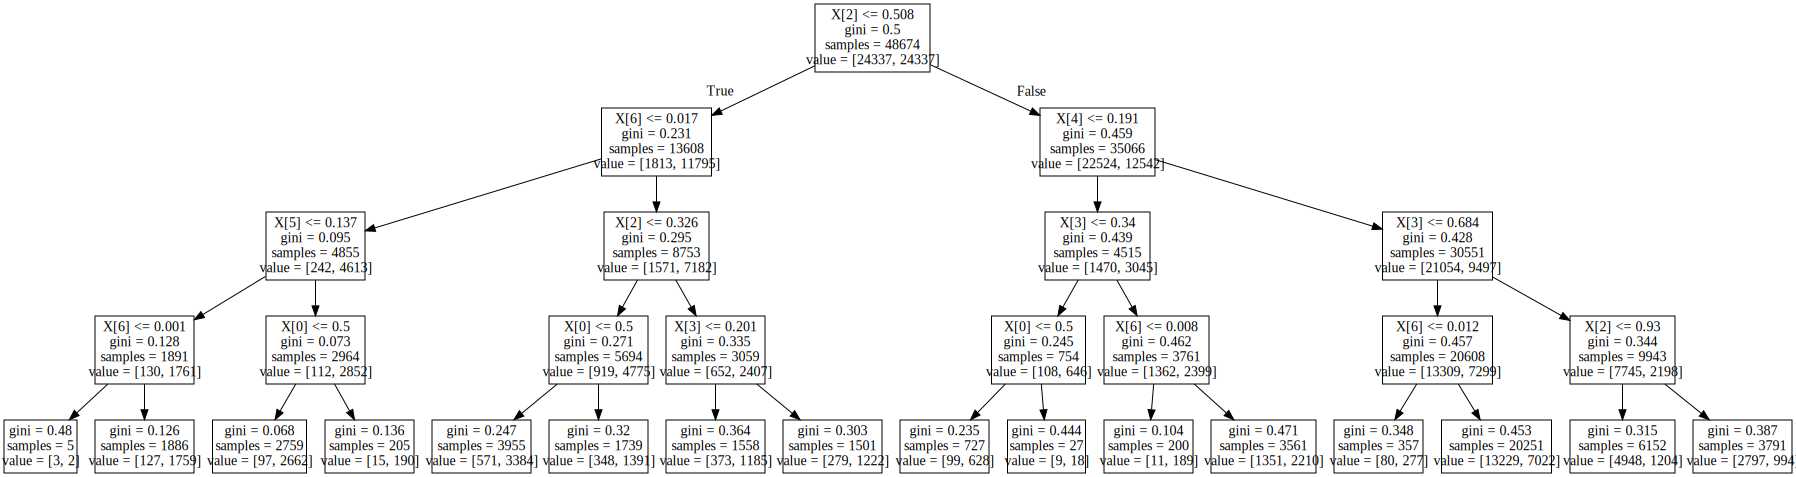

In [385]:
import graphviz
dot_data=tree.export_graphviz(clf_cart, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [386]:
tree.export_graphviz(clf_cart,out_file='tree.dot') 

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_cart.fit(X_train_resampled,y_train_resampled)
pred_train = clf_cart.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_cart.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.736
accuracy score of test set: 0.846
auc score of test set: 0.745
recall score of test set: 0.615
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.88      0.91     10967
        1.0       0.38      0.61      0.47      1386

avg / total       0.88      0.85      0.86     12353



In [388]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_cart.fit(X_train_resampled,y_train_resampled)
pred_train = clf_cart.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_cart.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.736
accuracy score of test set: 0.844
auc score of test set: 0.738
recall score of test set: 0.601
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.87      0.91      7314
        1.0       0.38      0.60      0.46       922

avg / total       0.88      0.84      0.86      8236



In [224]:
#huge tree; very messy
#import graphviz
#dot_data=tree.export_graphviz(clf_cart, out_file=None)
#graph = graphviz.Source(dot_data)
#graph

## <font color='blue'>RF</font>
<font color='black'>Model Ensemble - Bagging (Average)</font> 

In [225]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1, n_jobs=-1)

In [226]:
#https://www.kaggle.com/c/titanic/discussion/10089

In [227]:
#computationally expensive (time consuming) to do cv on RF

In [228]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_rf.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_rf.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_rf.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.744
accuracy score of test set: 0.845
auc score of test set: 0.729
recall score of test set: 0.578
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.88      0.91     12178
        1.0       0.38      0.58      0.46      1548

avg / total       0.88      0.85      0.86     13726

 
Fold 2:
accuracy score of training set: 0.744
accuracy score of test set: 0.845
auc score of test set: 0.732
recall score of test set: 0.588
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.88      0.91     12199
        1.0       0.37      0.59      0.46      1526

avg / total       0.88      0.84      0.86     13725

 
Fold 3:
accuracy score of training set: 0.742
accuracy score of test set: 0.848
auc score of test set: 0.735
recall score of test set: 0.589
classification report of test set: 
             precision    recall  f

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_rf.fit(X_train_resampled,y_train_resampled)
pred_train = clf_rf.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_rf.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.739
accuracy score of test set: 0.847
auc score of test set: 0.741
recall score of test set: 0.605
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.88      0.91     10967
        1.0       0.38      0.61      0.47      1386

avg / total       0.88      0.85      0.86     12353



In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_rf.fit(X_train_resampled,y_train_resampled)
pred_train = clf_rf.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_rf.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.743
accuracy score of test set: 0.844
auc score of test set: 0.735
recall score of test set: 0.594
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.88      0.91      7314
        1.0       0.38      0.59      0.46       922

avg / total       0.88      0.84      0.86      8236



In [231]:
np.round((clf_rf.feature_importances_)*10,3)

array([0.116, 0.426, 3.978, 0.338, 1.706, 2.139, 1.297])

## <font color='blue'>Naive Bayes</font>

In [232]:
#Explanation between the different types of Naive Bayes methods: Gaussian, Multinomial, Bernoulli:
#https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44

#Code to implement for Naive Bayes:
#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [233]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [234]:
#computationally expensive (time consuming) to do cv on NB

In [235]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    gnb.fit(X_train_resampled,y_train_resampled)
    pred_train = gnb.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = gnb.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.691
accuracy score of test set: 0.875
auc score of test set: 0.682
recall score of test set: 0.434
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93     12216
        1.0       0.43      0.43      0.43      1510

avg / total       0.88      0.88      0.88     13726

 
Fold 2:
accuracy score of training set: 0.683
accuracy score of test set: 0.877
auc score of test set: 0.701
recall score of test set: 0.473
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93     12155
        1.0       0.46      0.47      0.47      1570

avg / total       0.88      0.88      0.88     13725

 
Fold 3:
accuracy score of training set: 0.69
accuracy score of test set: 0.874
auc score of test set: 0.685
recall score of test set: 0.439
classification report of test set: 
             precision    recall  f1

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

gnb.fit(X_train_resampled,y_train_resampled)
pred_train = gnb.predict(X_train_resampled)
true_train = y_train_resampled
pred = gnb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.677
accuracy score of test set: 0.84
auc score of test set: 0.683
recall score of test set: 0.481
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.89      0.91     10967
        1.0       0.35      0.48      0.40      1386

avg / total       0.87      0.84      0.85     12353



In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

gnb.fit(X_train_resampled,y_train_resampled)
pred_train = gnb.predict(X_train_resampled)
true_train = y_train_resampled
pred = gnb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.688
accuracy score of test set: 0.877
auc score of test set: 0.694
recall score of test set: 0.46
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.93      0.93      0.93      7314
        1.0       0.45      0.46      0.45       922

avg / total       0.88      0.88      0.88      8236



## <font color='blue'>NN</font>

In [238]:
from sklearn.neural_network import MLPClassifier
clf_nn=MLPClassifier(random_state=1)

In [239]:
#computationally expensive (time consuming) to do cv on NN

In [240]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_nn.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_nn.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_nn.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.737
accuracy score of test set: 0.848
auc score of test set: 0.74
recall score of test set: 0.601
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.88      0.91     12209
        1.0       0.38      0.60      0.47      1517

avg / total       0.88      0.85      0.86     13726

 
Fold 2:
accuracy score of training set: 0.741
accuracy score of test set: 0.841
auc score of test set: 0.731
recall score of test set: 0.589
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.87      0.91     12198
        1.0       0.37      0.59      0.45      1527

avg / total       0.88      0.84      0.86     13725

 
Fold 3:
accuracy score of training set: 0.725
accuracy score of test set: 0.769
auc score of test set: 0.727
recall score of test set: 0.673
classification report of test set: 
             precision    recall  f1

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_nn.fit(X_train_resampled,y_train_resampled)
pred_train = clf_nn.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_nn.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.734
accuracy score of test set: 0.846
auc score of test set: 0.745
recall score of test set: 0.615
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.88      0.91     10967
        1.0       0.38      0.61      0.47      1386

avg / total       0.88      0.85      0.86     12353



In [242]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_nn.fit(X_train_resampled,y_train_resampled)
pred_train = clf_nn.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_nn.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.738
accuracy score of test set: 0.843
auc score of test set: 0.738
recall score of test set: 0.602
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.87      0.91      7314
        1.0       0.37      0.60      0.46       922

avg / total       0.88      0.84      0.86      8236



## <font color='blue'>AdaBoost</font>
<font color='black'>Model Ensemble - Boosting (Weighted Average)</font> 

In [243]:
#http://scikit-learn.org/stable/modules/ensemble.html#adaboost

In [244]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state=1)

In [245]:
#computationally expensive (time consuming) to do cv on AdaBoost

In [246]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_ada.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_ada.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_ada.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.745
accuracy score of test set: 0.834
auc score of test set: 0.735
recall score of test set: 0.608
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.86      0.90     12190
        1.0       0.36      0.61      0.45      1536

avg / total       0.88      0.83      0.85     13726

 
Fold 2:
accuracy score of training set: 0.744
accuracy score of test set: 0.844
auc score of test set: 0.734
recall score of test set: 0.592
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.88      0.91     12182
        1.0       0.38      0.59      0.46      1543

avg / total       0.88      0.84      0.86     13725

 
Fold 3:
accuracy score of training set: 0.733
accuracy score of test set: 0.836
auc score of test set: 0.752
recall score of test set: 0.644
classification report of test set: 
             precision    recall  f

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_ada.fit(X_train_resampled,y_train_resampled)
pred_train = clf_ada.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_ada.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.738
accuracy score of test set: 0.835
auc score of test set: 0.747
recall score of test set: 0.633
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.86      0.90     10967
        1.0       0.36      0.63      0.46      1386

avg / total       0.88      0.83      0.85     12353



In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_ada.fit(X_train_resampled,y_train_resampled)
pred_train = clf_ada.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_ada.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.736
accuracy score of test set: 0.832
auc score of test set: 0.735
recall score of test set: 0.611
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.86      0.90      7314
        1.0       0.36      0.61      0.45       922

avg / total       0.88      0.83      0.85      8236



## <font color='blue'>Gradient Boost</font>
<font color='black'>Model Ensemble - Boosting (Weighted Average) + Fastest descent route</font> 

In [249]:
#http://scikit-learn.org/stable/modules/ensemble.html#adaboost

In [250]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(random_state=1)

In [251]:
#computationally expensive (time consuming) to do cv on Gradient Boost

In [252]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    clf_gb.fit(X_train_resampled,y_train_resampled)
    pred_train = clf_gb.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = clf_gb.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

Fold 1:
accuracy score of training set: 0.737
accuracy score of test set: 0.845
auc score of test set: 0.747
recall score of test set: 0.621
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.87      0.91     12174
        1.0       0.38      0.62      0.48      1552

avg / total       0.88      0.84      0.86     13726

 
Fold 2:
accuracy score of training set: 0.74
accuracy score of test set: 0.849
auc score of test set: 0.743
recall score of test set: 0.606
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.88      0.91     12159
        1.0       0.40      0.61      0.48      1566

avg / total       0.88      0.85      0.86     13725

 
Fold 3:
accuracy score of training set: 0.75
accuracy score of test set: 0.845
auc score of test set: 0.73
recall score of test set: 0.582
classification report of test set: 
             precision    recall  f1-s

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_gb.fit(X_train_resampled,y_train_resampled)
pred_train = clf_gb.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_gb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.741
accuracy score of test set: 0.847
auc score of test set: 0.748
recall score of test set: 0.621
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.88      0.91     10967
        1.0       0.39      0.62      0.48      1386

avg / total       0.89      0.85      0.86     12353



In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

clf_gb.fit(X_train_resampled,y_train_resampled)
pred_train = clf_gb.predict(X_train_resampled)
true_train = y_train_resampled
pred = clf_gb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.741
accuracy score of test set: 0.844
auc score of test set: 0.741
recall score of test set: 0.608
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.87      0.91      7314
        1.0       0.38      0.61      0.47       922

avg / total       0.88      0.84      0.86      8236



## <font color='blue'>XG Boost</font>

In [255]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

In [256]:
#computationally expensive (time consuming) to do cv on XG Boost

In [257]:
Fold = 0
accuracy_values_train=[]
accuracy_values_test=[]
auc_values_test=[]
recall_values_test=[]

kf = model_selection.KFold(n_splits=3, shuffle=True)
for train_index, test_index in kf.split(clients_all_norm):

    X_train, X_test = X_Matrix.iloc[train_index], X_Matrix.iloc[test_index]
    y_train, y_test = y_series.iloc[train_index], y_series.iloc[test_index]
    
    X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)
    
    X_train_resampled = pd.DataFrame(X_train_resampled, columns = X_train.columns)
    y_train_resampled = (pd.Series(y_train_resampled)).rename('y_coded')
    
    xgb.fit(X_train_resampled,y_train_resampled)
    pred_train = xgb.predict(X_train_resampled)
    true_train = y_train_resampled
    pred = xgb.predict(X_test)
    true = y_test
    
    Fold+=1
    print("Fold "+ str(Fold) + ":")
    print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
    print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
    print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
    print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
    print("classification report of test set: ")
    print(classification_report(true, pred))
    print(" ")
    
    accuracy_values_train.append(metrics.accuracy_score(true_train,pred_train))
    accuracy_values_test.append(metrics.accuracy_score(true,pred))
    auc_values_test.append(metrics.roc_auc_score(true,pred))
    recall_values_test.append(metrics.recall_score(true,pred))
    
print("Overall:")
print("Training set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_train).round(decimals=3))+ ", " + str(np.std(accuracy_values_train).round(decimals=3)))          
print("Test set accuracy for all folds, Mean & Std: " +str(np.mean(accuracy_values_test).round(decimals=3))+ ", " + str(np.std(accuracy_values_test).round(decimals=3)))
print("Test set auc for all folds, Mean & Std: " + str(np.mean(auc_values_test).round(decimals=3)) + ", " + str(np.std(auc_values_test).round(decimals=3)))
print("Test set recall for all folds, Mean & Std: " + str(np.mean(recall_values_test).round(decimals=3))+ ", " + str(np.std(recall_values_test).round(decimals=3)))

/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fold 1:
accuracy score of training set: 0.741
accuracy score of test set: 0.849
auc score of test set: 0.742
recall score of test set: 0.603
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.88      0.91     12183
        1.0       0.39      0.60      0.47      1543

avg / total       0.88      0.85      0.86     13726

 


/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fold 2:
accuracy score of training set: 0.745
accuracy score of test set: 0.848
auc score of test set: 0.738
recall score of test set: 0.598
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.88      0.91     12225
        1.0       0.38      0.60      0.46      1500

avg / total       0.88      0.85      0.86     13725

 
Fold 3:
accuracy score of training set: 0.741
accuracy score of test set: 0.843
auc score of test set: 0.741
recall score of test set: 0.607
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.94      0.87      0.91     12129
        1.0       0.39      0.61      0.47      1596

avg / total       0.88      0.84      0.86     13725

 
Overall:
Training set accuracy for all folds, Mean & Std: 0.742, 0.002
Test set accuracy for all folds, Mean & Std: 0.847, 0.003
Test set auc for all folds, Mean & Std: 0.74, 0.001
Test set recall for all folds, 

/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.3, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

X_train_resampled = pd.DataFrame(X_train_resampled, columns = X_train.columns)
y_train_resampled = (pd.Series(y_train_resampled)).rename('y_coded')

xgb.fit(X_train_resampled,y_train_resampled)
pred_train = xgb.predict(X_train_resampled)
true_train = y_train_resampled
pred = xgb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.739
accuracy score of test set: 0.847
auc score of test set: 0.749
recall score of test set: 0.623
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.87      0.91     10967
        1.0       0.39      0.62      0.48      1386

avg / total       0.89      0.85      0.86     12353



/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X_Matrix, y_series, test_size=0.2, random_state=1)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

X_train_resampled = pd.DataFrame(X_train_resampled, columns = X_train.columns)
y_train_resampled = (pd.Series(y_train_resampled)).rename('y_coded')

xgb.fit(X_train_resampled,y_train_resampled)
pred_train = xgb.predict(X_train_resampled)
true_train = y_train_resampled
pred = xgb.predict(X_test)
true = y_test

print("accuracy score of training set: " + str(metrics.accuracy_score(true_train,pred_train).round(decimals=3)))
print("accuracy score of test set: " + str(metrics.accuracy_score(true,pred).round(decimals=3)))
print("auc score of test set: " + str(metrics.roc_auc_score(true,pred).round(decimals=3)))
print("recall score of test set: " + str(metrics.recall_score(true,pred).round(decimals=3)))
print("classification report of test set: ")
print(classification_report(true, pred))

accuracy score of training set: 0.741
accuracy score of test set: 0.844
auc score of test set: 0.742
recall score of test set: 0.611
classification report of test set: 
             precision    recall  f1-score   support

        0.0       0.95      0.87      0.91      7314
        1.0       0.38      0.61      0.47       922

avg / total       0.88      0.84      0.86      8236



/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/tanhongyue/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Method 4: Rebalancing using SMOTE

# Method 5: Rebalancing using Tomek

In [260]:
#gridsearch
#feature selection
#clustering